<a href="https://colab.research.google.com/github/Ubaton/Database-Management/blob/master/Mango_Leaf_Classifie.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
from PIL import Image
import numpy as np
import os
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [46]:
# Function to load and resize images
def load_and_resize_images(image_paths, target_size):
    resized_images = []
    for image_path in image_paths:
        img = Image.open(image_path)
        img = img.resize(target_size, Image.ANTIALIAS)
        resized_images.append(np.array(img) / 255.0)  # Normalize and add to the list
    return resized_images

In [47]:
# List of image file paths
image_paths = [
    '/content/sample_data/image1.jpeg',
    '/content/sample_data/image2.jpeg',
    '/content/sample_data/image3.jpeg',
    '/content/sample_data/image4.jpeg',
    '/content/sample_data/image5.jpeg'
]

In [48]:
# Target size for resizing
target_size = (100, 100)  # Change this to your desired size

# Load and resize images
resized_images = load_and_resize_images(image_paths, target_size)

# Define the number of classes in your dataset
num_classes = 10  # Replace 10 with the actual number of classes in your dataset

# Dummy labels for illustration (replace with actual labels)
labels = [0, 1, 2, 3, 4]

<ipython-input-46-f2f3e28c8c0e>:6: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = img.resize(target_size, Image.ANTIALIAS)


In [49]:

# Split the dataset into training, validation, and testing sets
train_ratio = 0.7
val_ratio = 0.15
test_ratio = 0.15

In [50]:
X_train, X_temp, y_train, y_temp = train_test_split(resized_images, labels, test_size=(1 - train_ratio), random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=(test_ratio / (test_ratio + val_ratio)), random_state=42)

In [51]:
# Convert labels to one-hot encoding
y_train = to_categorical(y_train, num_classes)
y_val = to_categorical(y_val, num_classes)
y_test = to_categorical(y_test, num_classes)

In [52]:
# Define the model architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(target_size[0], target_size[1], 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(num_classes, activation='softmax')
])

In [53]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [54]:
# Fit the model
model.fit(np.array(X_train), y_train, epochs=10, validation_data=(np.array(X_val), y_val))

Epoch 1/10
1/1 [==============================] - 1s 1s/step - loss: 2.2049 - accuracy: 0.0000e+00 - val_loss: 4.4981 - val_accuracy: 0.0000e+00
Epoch 2/10
1/1 [==============================] - 0s 156ms/step - loss: 0.9512 - accuracy: 0.3333 - val_loss: 7.1821 - val_accuracy: 0.0000e+00
Epoch 3/10
1/1 [==============================] - 0s 153ms/step - loss: 0.4945 - accuracy: 1.0000 - val_loss: 8.6404 - val_accuracy: 0.0000e+00
Epoch 4/10
1/1 [==============================] - 0s 178ms/step - loss: 0.2491 - accuracy: 1.0000 - val_loss: 10.3974 - val_accuracy: 0.0000e+00
Epoch 5/10
1/1 [==============================] - 0s 155ms/step - loss: 0.0902 - accuracy: 1.0000 - val_loss: 12.3087 - val_accuracy: 0.0000e+00
Epoch 6/10
1/1 [==============================] - 0s 156ms/step - loss: 0.0190 - accuracy: 1.0000 - val_loss: 14.5528 - val_accuracy: 0.0000e+00
Epoch 7/10
1/1 [==============================] - 0s 144ms/step - loss: 0.0051 - accuracy: 1.0000 - val_loss: 17.1852 - val_accuracy

In [55]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(np.array(X_test), y_test)
print(f"Test accuracy: {test_accuracy * 100:.2f}%")

1/1 [==============================] - 0s 35ms/step - loss: 35.5399 - accuracy: 0.0000e+00
Test accuracy: 0.00%


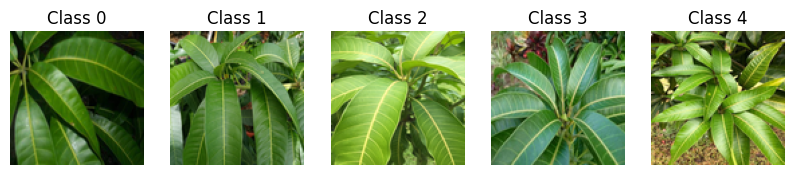

In [56]:
# Display a few sample images
plt.figure(figsize=(10, 5))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(resized_images[i])
    plt.title(f'Class {labels[i]}')
    plt.axis('off')
plt.show()

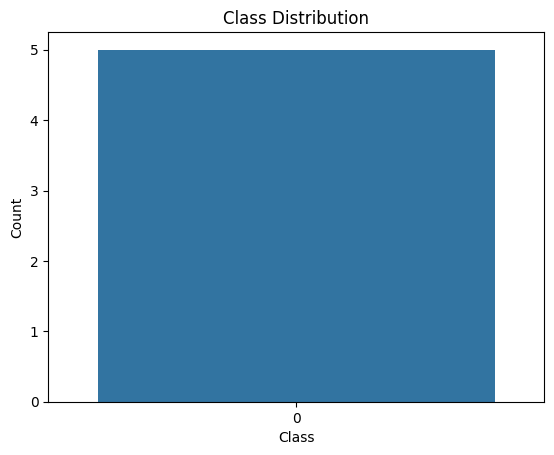

In [57]:
# Count the number of samples per class
class_counts = sns.countplot(labels)
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

Epoch 1/10
1/1 [==============================] - 0s 226ms/step - loss: 4.2849e-04 - accuracy: 1.0000 - val_loss: 26.4289 - val_accuracy: 0.0000e+00
Epoch 2/10
1/1 [==============================] - 0s 181ms/step - loss: 1.5217e-04 - accuracy: 1.0000 - val_loss: 27.9627 - val_accuracy: 0.0000e+00
Epoch 3/10
1/1 [==============================] - 0s 163ms/step - loss: 4.7841e-05 - accuracy: 1.0000 - val_loss: 29.2747 - val_accuracy: 0.0000e+00
Epoch 4/10
1/1 [==============================] - 0s 155ms/step - loss: 1.6888e-05 - accuracy: 1.0000 - val_loss: 30.4340 - val_accuracy: 0.0000e+00
Epoch 5/10
1/1 [==============================] - 0s 146ms/step - loss: 7.0730e-06 - accuracy: 1.0000 - val_loss: 31.4886 - val_accuracy: 0.0000e+00
Epoch 6/10
1/1 [==============================] - 0s 140ms/step - loss: 3.4173e-06 - accuracy: 1.0000 - val_loss: 32.4912 - val_accuracy: 0.0000e+00
Epoch 7/10
1/1 [==============================] - 0s 167ms/step - loss: 1.9471e-06 - accuracy: 1.0000 - va

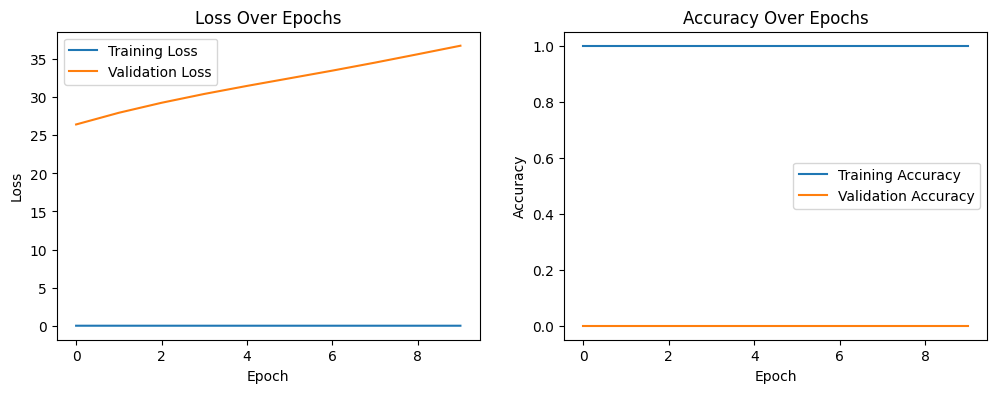

In [58]:
history = model.fit(np.array(X_train), y_train, epochs=10, validation_data=(np.array(X_val), y_val))

# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


1/1 [==============================] - 0s 86ms/step


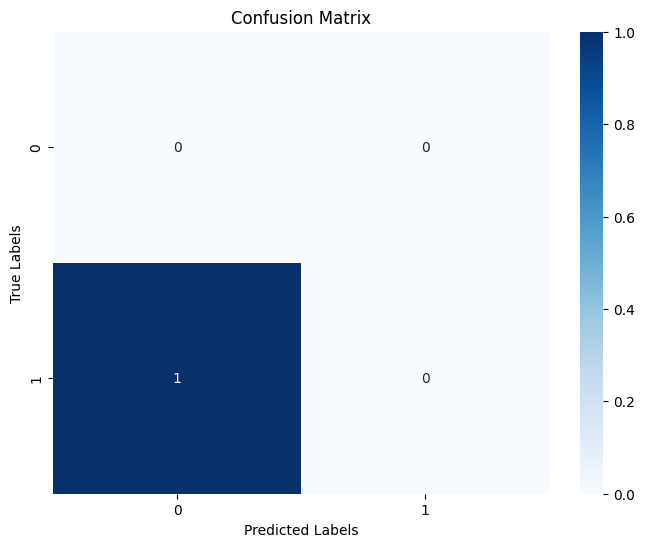

In [59]:
# Get predictions from the model
y_pred = model.predict(np.array(X_test))

# Convert one-hot encoded labels back to class labels
y_true = np.argmax(y_test, axis=1)
y_pred = np.argmax(y_pred, axis=1)

# Create a confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

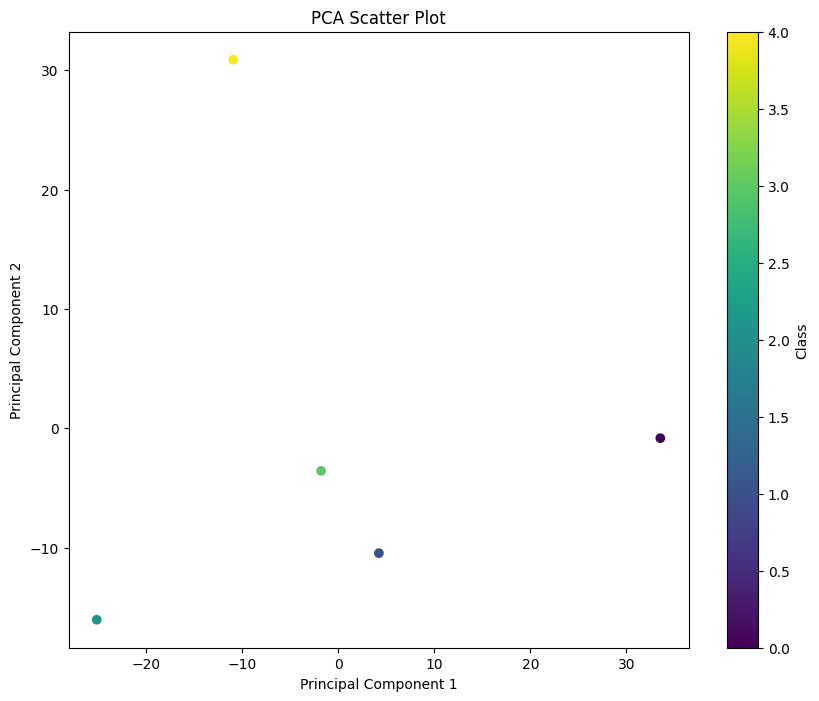

In [60]:
# Flatten the images (convert each image to a 1D array)
flattened_images = [image.flatten() for image in resized_images]

# Perform PCA to reduce the dimensionality to 2 components
pca = PCA(n_components=2)
pca_result = pca.fit_transform(flattened_images)

# Create a scatter plot of the PCA results
plt.figure(figsize=(10, 8))
scatter = plt.scatter(pca_result[:, 0], pca_result[:, 1], c=labels, cmap='viridis')
plt.colorbar(scatter, label='Class')
plt.title('PCA Scatter Plot')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()